In [1]:
# coding:utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ans = pd.read_csv('../datas/lgb60_month_3_yval_pred')
ans.head()

,is_risk,rowkey,time,id,y
0,1,784843,2015-06-07 21:10:30.0,78713,0.964201
1,1,785025,2015-06-07 21:41:44.0,162723,0.959416
2,1,784824,2015-06-07 21:07:30.0,78713,0.957786
3,1,778801,2015-06-06 23:19:54.0,118520,0.953083
4,1,784896,2015-06-07 21:18:48.0,53524,0.951288


In [12]:
login = pd.read_csv('../datas/t_login.csv')
login_test = pd.read_csv('../datas/t_login_test.csv')
login = pd.concat([login,login_test])
print login.shape
login.head()

(683393, 13)


,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,2.618369e+15,5.0,879361,10,1026491,194,1,1.428642e+09,1,116825,True,False,2015-04-10 12:54:19
1,9.969739e+14,16124.0,835072,1,1026491,194,1,1.428809e+09,1,109987,False,False,2015-04-12 11:20:45
2,8.123343e+15,5.0,879361,10,1026491,194,1,1.427705e+09,1,116825,True,False,2015-03-30 16:38:20
3,3.265677e+14,6.0,879361,10,1026491,194,1,1.428309e+09,1,116825,True,False,2015-04-06 16:22:18
4,6.684659e+15,4.0,879361,10,1026491,194,1,1.428221e+09,1,116825,True,False,2015-04-05 15:55:01


In [16]:
t = login.drop('log_id',axis=1)
t.drop_duplicates()
t.shape

(683393, 12)

In [17]:
t.head()

,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,5.0,879361,10,1026491,194,1,1.428642e+09,1,116825,True,False,2015-04-10 12:54:19
1,16124.0,835072,1,1026491,194,1,1.428809e+09,1,109987,False,False,2015-04-12 11:20:45
2,5.0,879361,10,1026491,194,1,1.427705e+09,1,116825,True,False,2015-03-30 16:38:20
3,6.0,879361,10,1026491,194,1,1.428309e+09,1,116825,True,False,2015-04-06 16:22:18
4,4.0,879361,10,1026491,194,1,1.428221e+09,1,116825,True,False,2015-04-05 15:55:01


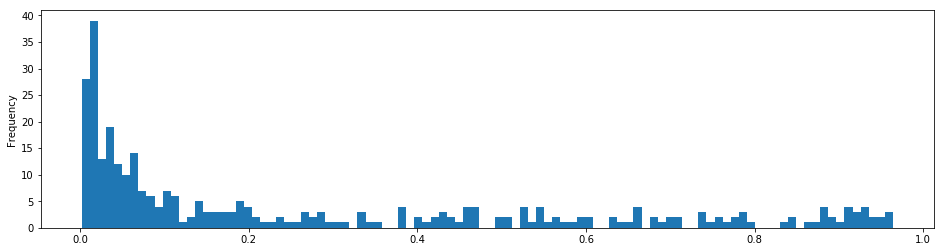

In [6]:
ans[ans['is_risk']==1]['y'].plot.hist(100,figsize=(16,4))
plt.show()

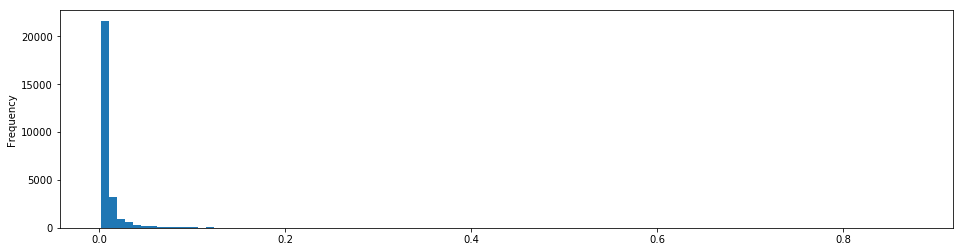

In [7]:
ans[ans['is_risk']==0]['y'].plot.hist(100,figsize=(16,4))
plt.show()

In [9]:
d = ans[ans['y']<0.3]
a = d[['id','is_risk']].groupby('id',as_index=False).count()
a = a.sort_values('is_risk',ascending=False)
a.head()

,id,is_risk
4036,66294,225
3004,49567,141
4518,74148,78
3561,59055,59
9806,160524,57


In [11]:
d = ans[(ans['is_risk']==1)&(ans['y']<0.3)]
a = d[['id','is_risk']].groupby('id',as_index=False).count()
a = a.sort_values('is_risk',ascending=False)
a.head(20)

,id,is_risk
24,48230,12
74,123869,11
46,80306,9
104,175546,8
65,107846,7
10,23303,6
85,139009,6
80,133149,5
30,55367,5
83,137849,4


In [27]:
t5 = login[login['time']>'2015-06-01 13:31:27.0']
# 2015-06-28 05:04:12.0
# 短时间内登陆 result 发生变化，两小时内
# 换 ip，device，city
# 2015-06-07 21:20:16.0
t5[t5['id']==162723].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,8.371131e+15,3000.0,752162,2,267034,404,1,1.433553e+09,1,162723,False,False,2015-06-06 09:07:08
1,2.555893e+14,3000.0,34901,2,267034,404,1,1.433554e+09,1,162723,False,False,2015-06-06 09:21:50
2,7.995275e+15,2000.0,980489,2,267034,404,1,1.433554e+09,1,162723,False,False,2015-06-06 09:30:18
3,8.636851e+13,6000.0,835072,2,454809,238,1,1.433597e+09,1,162723,False,False,2015-06-06 21:17:56
4,6.163267e+15,7457.0,497433,1,481875,238,1,1.433682e+09,1,162723,False,False,2015-06-07 21:07:38
5,9.095856e+15,2000.0,310602,2,481875,238,1,1.433683e+09,1,162723,False,False,2015-06-07 21:11:35
6,6.504707e+15,3000.0,688550,2,481875,238,1,1.433683e+09,1,162723,False,False,2015-06-07 21:12:31
7,7.914876e+14,21904.0,497433,1,481875,238,1,1.433685e+09,1,162723,False,False,2015-06-07 21:47:47
8,7.817727e+15,23233.0,497433,1,966611,238,1,1.433915e+09,1,162723,False,False,2015-06-10 13:41:00


In [57]:
t5 = login[login['time']>'2015-06-01 13:31:27.0']
# 2015-06-18 16:59:04.0
# 短时间内登陆 result 发生变化
# 换 ip，device，city
# 2015-06-05 17:25:55.0
t5[t5['id']==35880].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,5.802720e+15,4000.0,261953,2,267034,404,1,1.433370e+09,1,35880,False,False,2015-06-04 06:24:48
1,6.967807e+15,4000.0,119413,2,267034,404,1,1.433370e+09,1,35880,False,False,2015-06-04 06:26:31
2,4.491009e+15,4000.0,769319,2,267034,404,1,1.433371e+09,1,35880,False,False,2015-06-04 06:34:49
3,2.139727e+14,6000.0,835072,2,1166715,238,1,1.433373e+09,1,35880,False,False,2015-06-04 07:15:22
4,4.683137e+16,4000.0,393470,2,454809,238,1,1.433495e+09,1,35880,False,False,2015-06-05 17:02:28
5,1.460373e+16,13669.0,497433,1,454809,238,1,1.433495e+09,1,35880,False,False,2015-06-05 17:03:03
6,9.702657e+15,14295.0,497433,1,454809,238,1,1.433495e+09,1,35880,False,False,2015-06-05 17:10:50
7,6.759494e+15,4000.0,393470,2,454809,238,1,1.433495e+09,1,35880,False,False,2015-06-05 17:11:15


In [28]:
t5 = login[login['time']>'2015-06-01 13:31:27.0']
# 2015-06-28 05:04:12.0
# 短时间内登陆 result 发生变化
# 换 ip，device，city
# 2015-06-30 16:42:59.0
t5[t5['id']==27122].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,1.818649e+15,1656.0,835072,1,1303692,74,1,1.435253e+09,3,27122,False,False,2015-06-26 01:26:45
1,8.449890e+15,10910.0,896096,1,179611,74,1,1.435653e+09,3,27122,False,False,2015-06-30 16:27:39
2,6.138925e+15,27695.0,397755,1,859473,265,1,1.435654e+09,3,27122,False,False,2015-06-30 16:41:29
3,6.643419e+14,2332.0,835072,1,1354277,447,1,1.436015e+09,3,27122,False,False,2015-07-04 21:03:31


In [41]:
t5 = login[login['time']>'2015-06-09 12:00:22.0']
t5 = t5[t5['time']<'2015-06-24 22:27:16.0']
# 2015-06-16 14:28:36.0
# 短时间内登陆 result 发生变化
# 换 ip，device，city
t5[t5['id']==5944].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,2.564171e+15,108517.0,674175,1,1559364,277,1,1.434358e+09,1,5944,False,False,2015-06-15 16:47:27
1,3.527104e+15,5000.0,994085,2,797041,277,1,1.434429e+09,3,5944,False,False,2015-06-16 12:23:43
2,5.579129e+15,5000.0,1774,2,825568,277,31,1.434431e+09,3,5944,False,False,2015-06-16 12:58:20
3,6.490237e+15,5000.0,32473,2,825568,277,1,1.434431e+09,3,5944,False,False,2015-06-16 12:58:46
4,7.349426e+15,5000.0,405294,2,825568,277,1,1.434434e+09,3,5944,False,False,2015-06-16 13:49:02
5,8.956881e+15,6000.0,204208,2,825568,277,1,1.434436e+09,3,5944,False,False,2015-06-16 14:22:08
6,8.769222e+15,6000.0,924214,2,825568,277,1,1.434436e+09,3,5944,False,False,2015-06-16 14:27:35
7,3.588216e+15,6000.0,787316,2,825568,277,1,1.434441e+09,3,5944,False,False,2015-06-16 15:51:52
8,5.509546e+15,10677.0,674175,1,1559364,277,1,1.434452e+09,1,5944,False,False,2015-06-16 18:48:07
9,5.912519e+15,5000.0,464145,2,1148773,277,1,1.434463e+09,3,5944,False,False,2015-06-16 22:03:24


In [34]:
t5 = login[login['time']>'2015-06-01 13:31:27.0']
# 2015-06-10 13:05:29.0
# 短时间内登陆 result 发生变化
# 登陆次数多，ip 没有发生变化
t5[t5['id']==169467].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,8.168179e+15,4184.0,835072,1,1510516,194,1,1.433203e+09,1,169467,False,False,2015-06-02 07:55:12
1,3.594827e+16,5037.0,592936,1,1098706,77,1,1.433850e+09,1,169467,False,False,2015-06-09 19:42:51
2,6.240984e+15,4561.0,496182,1,238632,385,1,1.433901e+09,1,169467,False,False,2015-06-10 09:51:05
3,4.791954e+16,5726.0,955850,1,1241924,78,1,1.433912e+09,1,169467,False,False,2015-06-10 12:49:38
4,4.506440e+15,5687.0,972297,1,520066,20,1,1.433913e+09,1,169467,False,False,2015-06-10 13:04:02
5,1.757691e+16,22729.0,992861,1,1536071,101,31,1.434099e+09,1,169467,False,False,2015-06-12 16:50:27
6,1.527948e+16,40931.0,992861,1,1536071,101,31,1.434099e+09,1,169467,False,False,2015-06-12 16:50:45
7,7.435185e+15,53695.0,992861,1,1536071,101,1,1.434099e+09,1,169467,False,False,2015-06-12 16:50:58
8,4.195698e+15,6436.0,955850,1,1314902,207,31,1.434100e+09,1,169467,False,False,2015-06-12 17:12:13
9,2.097741e+16,23799.0,955850,1,1314902,207,31,1.434100e+09,1,169467,False,False,2015-06-12 17:12:30


In [40]:
t5 = login[login['time']>'2015-06-15 05:04:12.0']
# 2015-06-16 10:12:03.0
# 短时间内登陆 result 发生变化
# 换 ip，device，city
t5[t5['id']==10055].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,4.830496e+16,22934.0,215428,1,912545,404,-2,1.434401e+09,3,10055,False,False,2015-06-16 04:48:00
1,8.675640e+15,6000.0,211401,2,857671,179,1,1.434405e+09,3,10055,False,False,2015-06-16 05:44:15
2,1.057812e+16,6000.0,211401,2,857671,179,1,1.434405e+09,3,10055,False,False,2015-06-16 05:44:15
3,7.088192e+15,6000.0,211401,2,857671,179,1,1.434405e+09,3,10055,False,False,2015-06-16 05:44:16
4,1.176364e+15,6000.0,962062,2,1059694,44,1,1.434418e+09,3,10055,False,False,2015-06-16 09:21:47
5,1.517210e+15,6000.0,962062,2,1059694,44,1,1.434418e+09,3,10055,False,False,2015-06-16 09:21:48
6,5.863235e+15,7000.0,211401,2,1059694,44,31,1.434418e+09,3,10055,False,False,2015-06-16 09:25:27
7,7.353597e+15,7000.0,211401,2,1059694,44,31,1.434418e+09,3,10055,False,False,2015-06-16 09:25:28
8,1.145303e+16,5000.0,211401,2,1059694,44,1,1.434418e+09,3,10055,False,False,2015-06-16 09:25:40
9,6.645929e+14,19832.0,215428,1,1294033,44,1,1.434418e+09,3,10055,False,False,2015-06-16 09:32:05


In [18]:
t5 = login
# 2015-06-29 22:51:15.0
# 短时间内登陆 result 发生变化
t5[t5['id']==175546].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,3.486253e+15,4000.0,48392,2,1361931,21,31,1.435377e+09,3,175546,False,False,2015-06-27 11:44:51
1,4.876954e+15,4000.0,48392,2,1361931,21,1,1.435377e+09,3,175546,False,False,2015-06-27 11:44:59
2,4.835956e+16,18772.0,888934,1,1361931,21,1,1.435377e+09,3,175546,False,False,2015-06-27 11:49:10
3,5.135451e+15,140125.0,835072,1,1433802,397,1,1.435398e+09,3,175546,False,False,2015-06-27 17:35:27
4,4.419127e+16,7000.0,424615,2,1433802,397,31,1.435398e+09,3,175546,False,False,2015-06-27 17:41:05
5,2.871687e+14,4000.0,897596,2,1433802,397,1,1.435398e+09,3,175546,False,False,2015-06-27 17:41:59
6,9.803910e+14,7000.0,856476,2,1433802,397,1,1.435398e+09,3,175546,False,False,2015-06-27 17:47:52
7,4.767652e+15,6000.0,48392,2,1293739,21,1,1.435467e+09,3,175546,False,False,2015-06-28 12:56:45
8,7.490911e+15,6000.0,271316,2,437868,21,1,1.435501e+09,3,175546,False,False,2015-06-28 22:22:17
9,9.210110e+15,5000.0,267097,2,1189741,21,1,1.435597e+09,3,175546,False,False,2015-06-30 01:01:51


In [15]:
t5 = login
# 2015-06-23 16:33:19.0
# ip 短时间内换 device，换 log_from.device 也换 ip
# device 换 ip 的时间差，ip 换 device 的时间差，最近一次，min，max，mean
t5[t5['id']==80306].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,6.733529e+15,22678.0,362369,1,167389,276,1,1.427101e+09,1,80306,False,False,2015-03-23 17:03:06
1,3.220941e+15,8379.0,714919,1,1321812,459,1,1.427433e+09,1,80306,False,False,2015-03-27 13:03:11
2,8.485480e+15,11405.0,952411,1,981632,238,1,1.434771e+09,1,80306,False,False,2015-06-20 11:26:58
3,1.369983e+16,35492.0,845402,1,981632,238,1,1.434789e+09,1,80306,False,False,2015-06-20 16:38:06
4,6.885333e+15,291494.0,292549,1,1367983,238,1,1.435305e+09,1,80306,False,False,2015-06-26 15:52:53
5,3.395930e+16,6000.0,25749,2,1163773,238,1,1.435320e+09,1,80306,False,False,2015-06-26 20:00:58
6,8.842807e+15,6.0,832684,10,526422,396,1,1.435373e+09,1,80306,True,False,2015-06-27 10:41:06
7,4.657856e+15,6.0,832684,10,526422,396,1,1.435373e+09,1,80306,True,False,2015-06-27 10:41:12
8,8.939057e+15,6.0,832684,10,526422,396,1,1.435373e+09,1,80306,True,False,2015-06-27 10:41:16
9,5.844192e+15,4.0,832684,10,526422,396,1,1.435373e+09,1,80306,True,False,2015-06-27 10:41:20


In [45]:
t5 = login[login['time']>'2015-06-19 22:27:16.0']
# 2015-06-23 22:27:16.0
# ip 短时间内换 device，换 log_from.device 也换 ip
# device 换 ip 的时间差，ip 换 device 的时间差，最近一次，min，max，mean
t5[t5['id']==55341].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,9.270084e+15,15581.0,972588,1,940609,224,1,1.434753e+09,1,55341,False,False,2015-06-20 06:33:56
1,1.274056e+16,24119.0,881029,1,211091,36,1,1.434788e+09,1,55341,False,False,2015-06-20 16:12:55
2,6.134348e+15,9248.0,599674,1,263800,224,1,1.434854e+09,1,55341,False,False,2015-06-21 10:33:14
3,5.514802e+14,3000.0,607386,2,859185,269,1,1.434877e+09,1,55341,False,False,2015-06-21 16:56:46
4,4.688005e+14,7043.0,208989,1,1339535,270,1,1.434877e+09,1,55341,False,False,2015-06-21 17:03:10
5,1.402512e+16,46928.0,881029,1,1019141,36,1,1.434951e+09,1,55341,False,False,2015-06-22 13:30:05
6,1.976747e+16,8000.0,607386,2,896484,484,1,1.435060e+09,1,55341,False,False,2015-06-23 19:46:25
7,9.623196e+15,7509.0,42873,1,79145,252,1,1.435060e+09,1,55341,False,False,2015-06-23 19:51:58
8,3.269607e+15,6000.0,607386,2,713721,68,1,1.435069e+09,1,55341,False,False,2015-06-23 22:09:16
9,5.534141e+15,226638.0,143700,1,686874,194,1,1.435070e+09,1,55341,False,False,2015-06-23 22:26:34


In [50]:
t5 = login[login['time']>'2015-06-14 03:17:28.0']
t5 = t5[t5['time']<'2015-06-20 03:17:28.0']
# 2015-06-18 03:17:28.0
# 短时间内，多次 result=31，也出现了接着 result = 1
# 登陆时间间隔小于 20 的次数
t5[t5['id']==125499].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,8.544854e+15,10607.0,849540,1,1147009,63,1,1.434566e+09,3,125499,False,False,2015-06-18 02:26:25
1,4.456127e+16,5000.0,173429,2,1147009,63,1,1.434566e+09,3,125499,False,False,2015-06-18 02:39:37
2,3.516041e+15,6000.0,377722,2,830450,63,1,1.434568e+09,3,125499,False,False,2015-06-18 03:05:13
3,5.798824e+15,7000.0,377722,2,830450,63,1,1.434574e+09,3,125499,False,False,2015-06-18 04:46:13
4,3.520621e+16,11710.0,930022,1,1147009,63,1,1.434575e+09,3,125499,False,False,2015-06-18 05:00:01
5,7.312334e+15,14096.0,849540,1,1147009,63,1,1.434575e+09,3,125499,False,False,2015-06-18 05:03:14
6,5.492294e+14,8000.0,377722,2,451870,70,1,1.434582e+09,3,125499,False,False,2015-06-18 06:59:16
7,7.662335e+15,7000.0,377722,2,830450,63,1,1.434582e+09,3,125499,False,False,2015-06-18 06:59:26
8,3.267189e+16,5000.0,377722,2,830450,63,1,1.434596e+09,3,125499,False,False,2015-06-18 10:48:55
9,9.795397e+15,6000.0,377722,2,830450,63,1,1.434611e+09,3,125499,False,False,2015-06-18 14:55:15


In [47]:
t5 = login
# 2015-06-26 17:21:52.0
# 2015-06-29 22:51:15.0
# 短时间内，多次 result=31，也出现了接着 result = 1
# 登陆时间间隔小于 20 的次数
t5[t5['id']==162723].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,4.300641e+16,2858.0,835072,1,77097,268,1,1.432903e+09,1,162723,False,False,2015-05-29 20:31:52
1,8.371131e+15,3000.0,752162,2,267034,404,1,1.433553e+09,1,162723,False,False,2015-06-06 09:07:08
2,2.555893e+14,3000.0,34901,2,267034,404,1,1.433554e+09,1,162723,False,False,2015-06-06 09:21:50
3,7.995275e+15,2000.0,980489,2,267034,404,1,1.433554e+09,1,162723,False,False,2015-06-06 09:30:18
4,8.636851e+13,6000.0,835072,2,454809,238,1,1.433597e+09,1,162723,False,False,2015-06-06 21:17:56
5,6.163267e+15,7457.0,497433,1,481875,238,1,1.433682e+09,1,162723,False,False,2015-06-07 21:07:38
6,9.095856e+15,2000.0,310602,2,481875,238,1,1.433683e+09,1,162723,False,False,2015-06-07 21:11:35
7,6.504707e+15,3000.0,688550,2,481875,238,1,1.433683e+09,1,162723,False,False,2015-06-07 21:12:31
8,7.914876e+14,21904.0,497433,1,481875,238,1,1.433685e+09,1,162723,False,False,2015-06-07 21:47:47
9,7.817727e+15,23233.0,497433,1,966611,238,1,1.433915e+09,1,162723,False,False,2015-06-10 13:41:00


In [46]:
t5 = login
# 2015-06-26 17:21:52.0
# 2015-06-29 22:51:15.0
# 短时间内，多次 result=31，也出现了接着 result = 1
# 登陆时间间隔小于 20 的次数
t5[t5['id']==175546].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,3.486253e+15,4000.0,48392,2,1361931,21,31,1.435377e+09,3,175546,False,False,2015-06-27 11:44:51
1,4.876954e+15,4000.0,48392,2,1361931,21,1,1.435377e+09,3,175546,False,False,2015-06-27 11:44:59
2,4.835956e+16,18772.0,888934,1,1361931,21,1,1.435377e+09,3,175546,False,False,2015-06-27 11:49:10
3,5.135451e+15,140125.0,835072,1,1433802,397,1,1.435398e+09,3,175546,False,False,2015-06-27 17:35:27
4,4.419127e+16,7000.0,424615,2,1433802,397,31,1.435398e+09,3,175546,False,False,2015-06-27 17:41:05
5,2.871687e+14,4000.0,897596,2,1433802,397,1,1.435398e+09,3,175546,False,False,2015-06-27 17:41:59
6,9.803910e+14,7000.0,856476,2,1433802,397,1,1.435398e+09,3,175546,False,False,2015-06-27 17:47:52
7,4.767652e+15,6000.0,48392,2,1293739,21,1,1.435467e+09,3,175546,False,False,2015-06-28 12:56:45
8,7.490911e+15,6000.0,271316,2,437868,21,1,1.435501e+09,3,175546,False,False,2015-06-28 22:22:17
9,9.210110e+15,5000.0,267097,2,1189741,21,1,1.435597e+09,3,175546,False,False,2015-06-30 01:01:51


In [ ]:
54996,66294,58319,98603,10055,98868,27122

In [58]:
t5 = login[login['time']>'2015-06-18 00:55:22.0']
# 2015-06-27 05:01:43.0
# 短时间内，多次 result=31，也出现了接着 result = 1
# 登陆时间间隔小于 20 的次数
t5[t5['id']==98868].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,6.434690e+15,18064.0,437956,1,797656,383,-2,1.434956e+09,3,98868,False,False,2015-06-22 14:56:01
1,8.446570e+15,7000.0,398407,2,510972,462,1,1.435029e+09,3,98868,False,False,2015-06-23 11:08:19
2,4.125326e+16,12192.0,38273,1,510972,462,1,1.435029e+09,3,98868,False,False,2015-06-23 11:08:37
3,6.125310e+15,487.0,835072,1,1385495,194,1,1.435261e+09,3,98868,False,False,2015-06-26 03:37:47
4,9.528404e+15,25704.0,193586,1,697797,87,1,1.435333e+09,3,98868,False,False,2015-06-26 23:30:49
5,1.732624e+16,11000.0,801142,2,450911,194,1,1.435333e+09,3,98868,False,False,2015-06-26 23:35:04
6,9.905048e+15,22320.0,835072,1,382442,364,-2,1.435344e+09,3,98868,False,False,2015-06-27 02:43:59
7,6.215103e+15,8000.0,422039,2,664970,462,1,1.435348e+09,3,98868,False,False,2015-06-27 03:41:55
8,2.700851e+15,4788.0,835072,1,694314,44,-2,1.435396e+09,3,98868,False,False,2015-06-27 17:08:25
9,4.333833e+16,7000.0,879268,2,1339130,194,31,1.435414e+09,3,98868,False,False,2015-06-27 22:00:53


In [53]:
t5 = login[login['time']>'2015-06-18 00:55:22.0']
# 2015-06-20 00:55:22.0
# 短时间内，多次 result=31，也出现了接着 result = 1
# 登陆时间间隔小于 20 的次数
t5[t5['id']==54996].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,2.282919e+16,11522.0,372736,1,301648,277,1,1.435162e+09,1,66294,False,False,2015-06-25 00:07:19
1,4.474963e+16,7000.0,685372,2,670786,20,1,1.438215e+09,1,66294,False,False,2015-07-30 08:03:14


In [56]:
t5 = login[login['time']>'2015-06-04 13:45:08.0']
t5 = t5[t5['time']<'2015-06-08 03:17:28.0']
# 2015-06-07 13:45:08.0
# 短时间内，多次 result=31，也出现了接着 result = 1
# 登陆时间间隔小于 20 的次数
t5[t5['id']==66294].sort_values('time').reset_index(drop=True)

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,1.208135e+16,26610.0,335262,1,1270046,277,1,1.433638e+09,1,66294,False,False,2015-06-07 08:53:19
1,9.237460e+15,116041.0,335262,1,1270046,277,1,1.433639e+09,1,66294,False,False,2015-06-07 08:57:04
2,1.164016e+14,42941.0,453317,1,1270046,277,1,1.433640e+09,1,66294,False,False,2015-06-07 09:22:52
3,6.777856e+15,10270.0,835072,1,1241948,277,1,1.433646e+09,1,66294,False,False,2015-06-07 11:00:17
4,8.579914e+15,13123.0,988113,1,1241948,277,1,1.433649e+09,1,66294,False,False,2015-06-07 11:45:39
5,7.606122e+15,3451.0,453317,1,1241948,277,1,1.433655e+09,1,66294,False,False,2015-06-07 13:30:41
6,9.105957e+15,22881.0,453317,1,1241948,277,1,1.433671e+09,1,66294,False,False,2015-06-07 17:53:52
7,5.102161e+15,21710.0,285242,1,1270046,277,1,1.433676e+09,1,66294,False,False,2015-06-07 19:15:47
8,7.070315e+15,4492.0,835072,1,1270046,277,1,1.433676e+09,1,66294,False,False,2015-06-07 19:17:36
9,2.299690e+16,15830.0,285242,1,1270046,277,31,1.433690e+09,1,66294,False,False,2015-06-07 23:09:37
